# ADM HW 2. Questions 1,2,4,7

In [1]:
#Loading datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('/home/dias/Desktop/HW/2020-Mar.csv')
name ='March'
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-03-01 00:00:00 UTC,view,10900348,2232732105912091273,appliances.kitchen.mixer,kitfort,117.63,550295099,23f5ab9e-7774-416d-900b-f2725da671aa
1,2020-03-01 00:00:01 UTC,view,14300020,2232732107967300275,apparel.underwear,casio,264.37,622070532,edf19213-f0dd-46e1-ae18-28968dbddd6e
2,2020-03-01 00:00:03 UTC,view,13200063,2232732061804790604,furniture.bedroom.bed,NaN,126.10,552832344,608087d8-6b69-21db-50a3-2b91ba015532
3,2020-03-01 00:00:03 UTC,view,100077498,2232732085846540487,construction.tools.generator,tamina,424.72,613391860,5ab6c3d5-edd7-4e15-8b0a-75b467a37fd0
4,2020-03-01 00:00:04 UTC,view,1005014,2232732093077520756,construction.tools.light,samsung,482.73,517021211,0c34308d-c455-40bb-9992-3e44920bc2b9


In [2]:
#Setting numbers to show in float 
pd.set_option('float_format', '{:f}'.format)

In [3]:
#Getting information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56341241 entries, 0 to 56341240
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 3.8+ GB


In [4]:
df.describe()

,product_id,category_id,price,user_id
count,56341241.000000,56341241.000000,56341241.000000,56341241.000000
mean,30878997.586006,2182505965089136896.000000,292.726110,569913893.060966
std,39480770.803740,80537835194082928.000000,363.079839,42695669.049472
min,1000978.000000,2053013551857008896.000000,0.000000,12511517.000000
25%,1801966.000000,2053013563550728960.000000,62.290000,525258746.000000
50%,11400268.000000,2232732093077520640.000000,168.130000,569570268.000000
75%,42200005.000000,2232732098228126208.000000,361.400000,612463287.000000
max,100184736.000000,2261590998150807808.000000,2574.070000,635166340.000000


In [5]:
df.dtypes

event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

## [RQ1] A marketing funnel describes your customer’s journey with your e-commerce. It may involve different stages, beginning when someone learns about your business, when he/she visits your website for the first time, to the purchasing stage, marketing funnels map routes to conversion and beyond. Suppose your funnel involves just three simple steps: 1) view, 2) cart, 3) purchase. Which is the rate of complete funnels? 

In [6]:
df.event_type.unique()

array(['view', 'purchase', 'cart'], dtype=object)

In [7]:
#Here I group all event_time values by product_id and user_id 
table1 = pd.pivot_table(df, values='event_time', index=['product_id','user_id'],
                    columns=['event_type'], aggfunc=len)
a=table1.dropna()
complete_funnels = a.min(axis=1).sum()
#I drop rows where at least one of them wasn't made, count sum and divide by total length
print('Rate of complete funnels in {} = {}'.format(name,complete_funnels/len(table1)))

Rate of complete funnels in March = 0.034756532576700666


### What’s the operation users repeat more on average within a session? Produce a plot that shows the average number of times users perform each operation (view/removefromchart etc etc).

In [8]:
#Here I grouped by session and took all average numbers of events in event_type
mean=[]
for i in df.event_type.unique():
    mean.append(df[df.event_type == i].groupby(['user_session']).event_type.count())
for i in range(len(mean)):
    mean[i]=mean[i].mean()
mean

[4.150489686428316, 1.2070230891888518, 1.8114670663433126]

The operation users repeat more on average within a session in March: 


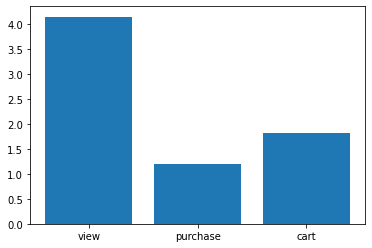

In [9]:
#and then plot a bar, and took tha name of event with highest number
plt.bar(df.event_type.unique(),mean);
print('The operation users repeat more on average within a session in {}: '.format(name, df.event_type.unique()[0]))

### How many times, on average, a user views a product before adding it to the cart?

In [ ]:
#I made a pivot table of the times of first events that users made
table = pd.pivot_table(df, values='event_time', index=['product_id','user_id'],
                    columns=['event_type'], aggfunc=min)
table

In [ ]:
#and then counted probability of user to view a product before buying
answer = len(table[table['view']<table['cart']])/len(table)
answer

### What’s the probability that products added once to the cart are effectively bought?

In [ ]:
# the same pivot from above, counting all rows with time of 'cart' before the 'purchase' and divide by total length
answer = len(table[table['cart']<table['purchase']])/len(table['cart'].dropna())
answer

## [RQ2] What are the categories of the most trending products overall? For each month visualize this information through a plot showing the number of sold products per category. 

In [10]:
import seaborn as sns
#split category_code into 'category' and 'subcategory' columns
df[['category', 'subcategory']] = df['category_code'].str.split('.', 1, expand=True)
#count number of purchases of products and sort in descending order
group_purchase_by_cat=df[df['event_type']=='purchase'].groupby(['product_id','category']).count()

In [11]:
group_purchase_by_cat['user_id'].sort_values(ascending=False).head(10)
#As you can see the category of most trending products is electronics

product_id  category    
1005100     construction    24134
1005115     construction    23996
1004767     construction    19938
1005212     construction    19567
4804056     sport           19183
1002544     construction    18778
100068488   construction    18622
1004856     construction    12922
1005160     construction    12824
1005105     construction     9713
Name: user_id, dtype: int64

/home/dias/TTS/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of purchases')

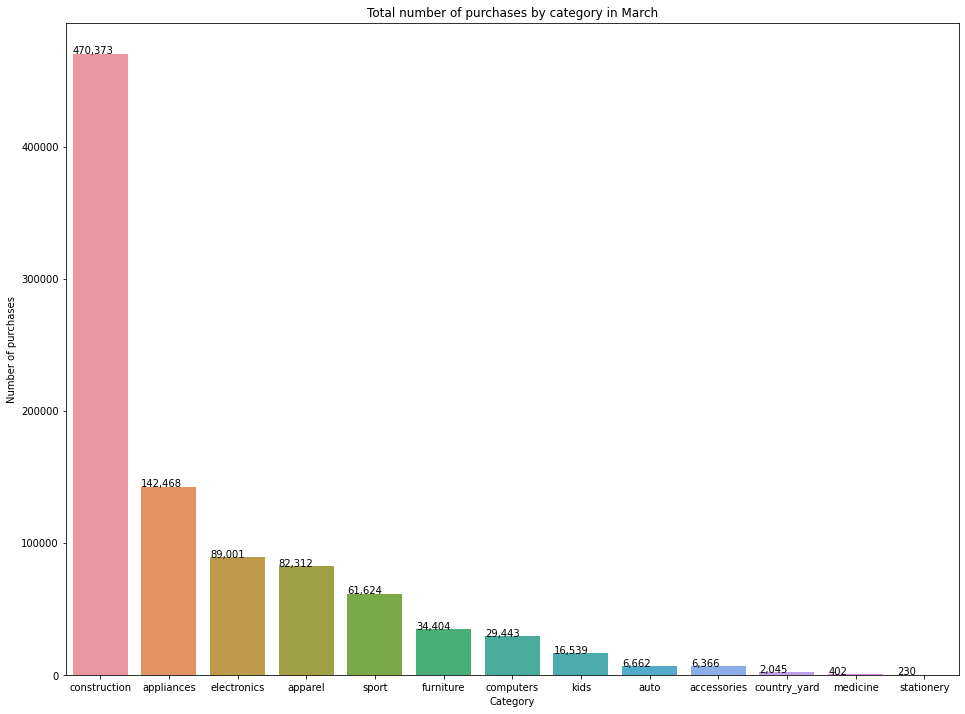

In [12]:
group_purchase_by_cat=df[df['event_type']=='purchase'].groupby(['category'])['price'].count()
sorted_group_purchase_by_cat = group_purchase_by_cat.dropna().sort_values(ascending=False)
plt.figure(figsize =(16, 12)) 
index_category = [str(i) for i in sorted_group_purchase_by_cat.index]
ax= sns.barplot(index_category,sorted_group_purchase_by_cat)
for p in ax.patches:
    ax.annotate(format(p.get_height(),',.0f'), (p.get_x() , p.get_height()),)
plt.title('Total number of purchases by category in {}'.format(name))
plt.xlabel('Category')
plt.ylabel('Number of purchases')

### Plot the most visited subcategories.

/home/dias/TTS/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of views')

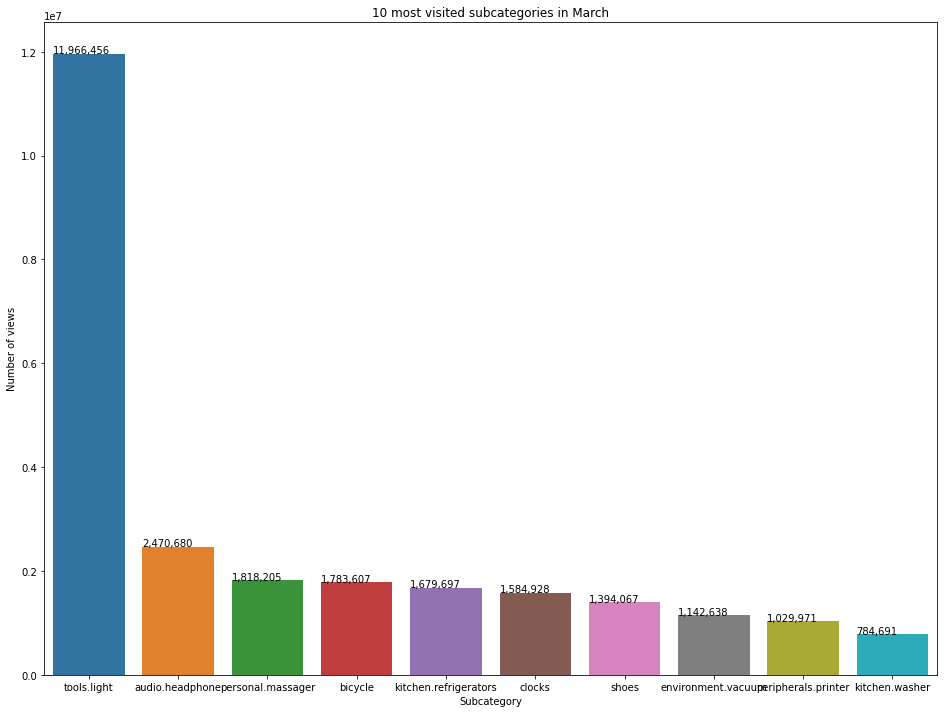

In [13]:
group_view_by_subcat=df[df['event_type']=='view'].groupby(['subcategory'])['price'].count()
sorted_group_view_by_subcat = group_view_by_subcat.dropna().sort_values(ascending=False)
plt.figure(figsize =(16, 12)) 
index_category = [str(i) for i in sorted_group_view_by_subcat.index]
ax= sns.barplot(index_category[:10],sorted_group_view_by_subcat[:10])
for p in ax.patches:
    ax.annotate(format(p.get_height(),',.0f'), (p.get_x() , p.get_height()),)
plt.title('10 most visited subcategories in {}'.format(name))
plt.xlabel('Subcategory')
plt.ylabel('Number of views')

### What are the 10 most sold products per category?

In [14]:
#Delete nan in order to avoid error
bf = df['category'].unique()
for i in bf:
    try:
        #make pivot table for each category, and sort values in descending order
        table4 = pd.pivot_table(df[df['category']==i], values='event_time', index=['category','product_id'],
                        columns=['event_type'], aggfunc=len)
        print(table4['purchase'].dropna().sort_values(ascending =False)[:9])
    except:
        print('No purchases in {}'.format(i))

category    product_id
appliances  1801690      2579.000000
            1801766      1926.000000
            1801881      1651.000000
            3700926      1598.000000
            3600661      1233.000000
            1801940      1153.000000
            3601405      1139.000000
            26300078     1041.000000
            1801636       946.000000
Name: purchase, dtype: float64
category  product_id
apparel   5100816      6435.000000
          4100126      1451.000000
          100058915    1378.000000
          5100503      1130.000000
          16500007      833.000000
          1201465       813.000000
          4100346       703.000000
          1200947       657.000000
          1201504       619.000000
Name: purchase, dtype: float64
category   product_id
furniture  2900958      1240.000000
           3801134       602.000000
           2900561       552.000000
           11400666      366.000000
           100157019     364.000000
           11400317      354.000000
        

## [RQ4] How much does each brand earn per month? 

In [15]:
#made a pivot table to sum the selling price per each brand
brand_sum = pd.pivot_table(df, values='price', index=['brand'],
                    columns=['event_type'], aggfunc=sum)
brand_sum

event_type,cart,purchase,view
brand,,,
a-case,6716.200000,1735.710000,226728.900000
a-derma,387.090000,96.850000,9022.080000
a-elita,8.490000,nan,975.030000
a-mega,2044.020000,769.660000,28351.830000
a-toys,nan,nan,523.340000
...,...,...,...
zvezda,nan,nan,103.050000
zwerg,nan,nan,79.930000
zwilling,nan,nan,123357.400000


In [16]:
#How much does each brand earn per month?
brand_revenue = brand_sum['purchase'].sort_values(ascending=False)
brand_revenue

brand
apple      141315339.780029
samsung     65440260.339983
xiaomi      12560349.739998
acer         6432710.560000
huawei       5866907.370000
                 ...       
zuru                    nan
zvezda                  nan
zwerg                   nan
zwilling                nan
zx                      nan
Name: purchase, Length: 4653, dtype: float64

### Write a function that given the name of a brand in input returns, for each month, its profit.

In [17]:
# Function that given the name of a brand in input returns, for each month, its profit. 
def profit_of_brand(brand_name,month):
    return month['purchase'][brand_name]

def profit_of_brand_for_each_month(brand_name,list_of_months):
    return [i['purchase'][brand_name] for i  in list_of_months]

### Is the average price of products of different brands significantly different? 

In [18]:
#Is the average price of products of different brands significantly different? 

table3 = pd.pivot_table(df, values='price', index=['subcategory','brand'],

                    columns=['event_type'], aggfunc='mean')
table3[:50]


event_type                                     cart   purchase       view
subcategory             brand                                            
accessories.alarm       absolutechampion        nan        nan  10.300000
                        appollo                 nan        nan  54.060000
                        autoline                nan        nan 352.905000
                        avis              43.756667  18.020000  53.477845
                        body-solid              nan        nan 341.320000
                        centurion               nan        nan  33.460000
                        dds              360.110000 360.110000 360.110000
                        domyos            25.742000        nan  27.780753
                        dsk                     nan        nan  66.916449
                        ersport           26.127000  26.062500  26.462400
                        farcar            18.020000  18.020000  18.020000
                        incar             50.190000  50.190000  36.663656
                        kgb                     nan        nan  84.940000
                        mydean            14.728889  12.870000  24.184051
                        pandora                 nan        nan 221.157778
                        phantom           12.870000        nan  12.870000
                        pioneer                 nan        nan  64.350000
                        romana            43.888182  65.506667  82.472653
                        scher-khan              nan        nan  77.890000
                        silapro           15.960000  15.960000  15.960000
                        sparta            29.320000  29.320000  29.320000
                        starline         217.250000 217.250000 203.064578
                        swat              40.807619  41.108462  41.091316
                        tomahawk                nan        nan  86.230000
                        torneo            22.650000  22.650000  22.650000
                        tuka              16.730000  16.730000  16.730000
accessories.anti_freeze alexrojo                nan        nan  38.610000
                        barokko                 nan        nan  12.380000
                        bartek            46.080000  46.080000  46.080000
                        biomecanics       46.288333  45.882500  39.137886
                        boarteks                nan        nan  44.770000
                        bugaboo                 nan        nan 141.550000
                        burton                  nan        nan 630.390000
                        elegant                 nan        nan  11.070000
                        garvalin          36.657059  38.696667  43.232548
                        intex                   nan        nan  69.350000
                        marko                   nan        nan  43.220000
                        minimen           41.510000        nan  40.619343
                        minno             38.585000        nan  38.737525
                        neposeda                nan        nan  25.230000
                        pablosky          55.747143  51.823333  47.573345
                        sherlock                nan        nan  16.910000
                        stolicatekstila         nan        nan  31.440000
                        timson            15.617797  15.744211  16.080048
                        verran                  nan        nan  30.890000
                        vladi                   nan        nan  30.718333
accessories.compressor  intex                   nan        nan  77.172857
                        airline           47.534800  47.574444  47.674091
                        alligator               nan        nan  59.980000
                        aquamarine              nan        nan  37.320000

##  [RQ7] The Pareto principle states that for many outcomes roughly 80% of consequences come from 20% of the causes. Also known as 80/20 rule, in e-commerce simply means that most of your business, around 80%, likely comes from about 20% of your customers.

    Prove that the pareto principle applies to your store.


In [19]:
group_purchase_by_user=df[df['event_type']=='purchase'].groupby(['user_id'])['price'].sum()
sorted_group_purchase_by_user = group_purchase_by_user.dropna().sort_values(ascending=False)
sorted_group_purchase_by_user
#Group by user and sort all purchases by descending order

user_id
595104624   527776.780000
610871788   254009.460000
624819201   206238.020000
542157411   198634.770000
626212229   185189.290000
                 ...     
628229180        0.800000
592888725        0.790000
512557326        0.790000
600094403        0.790000
623981352        0.770000
Name: price, Length: 453487, dtype: float64

In [20]:
group_purchase_by_product=df[df['event_type']=='purchase']['price'].sum()
group_purchase_by_product
#get all the revenue that was made in this month

321378408.32000005

Percent of money 20 % of customers gave out of total 321378408.32000005: 70.63901320151875%


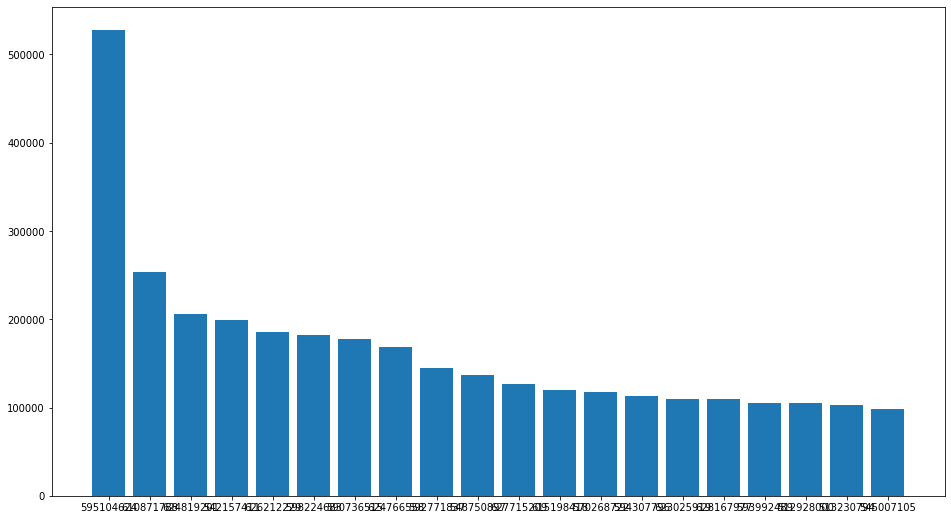

In [21]:
plt.figure(figsize =(16, 9)) 
amount_of_20percent_customers = len(sorted_group_purchase_by_user) * 0.2
#Count % of money that 20% of top customers gave
index_user = [str(i) for i in sorted_group_purchase_by_user.index]
plt.bar(index_user[:20],sorted_group_purchase_by_user[:20])
print('Percent of money 20 % of customers gave out of total {}: {}%'.format(group_purchase_by_product,sum(sorted_group_purchase_by_user[:int(amount_of_20percent_customers)]) /(group_purchase_by_product/100) ))